In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras import Input

from sklearn.metrics import confusion_matrix as conf
import os, sys

In [8]:
current_path = os.path.dirname(os.path.abspath(sys.argv[1]))

In [10]:
train_df = pd.read_csv(current_path + "/digit-recognizer/train.csv")
test_df = pd.read_csv(current_path + "/digit-recognizer/test.csv")

In [11]:
print(train_df.shape)
train_df.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
print(test_df.shape)
test_df.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
colnames = train_df.columns

In [132]:
xvals_df = train_df[colnames[colnames != 'label']].copy()
yvals_df = train_df[['label']].copy()
print("X shape : ", xvals_df.shape)
print("Y shape : ", yvals_df.shape)

X shape :  (42000, 784)
Y shape :  (42000, 1)


In [133]:
yvals_df.head()

,label
0,1
1,0
2,1
3,4
4,0


In [134]:
ylabels = pd.get_dummies(yvals_df['label'])
yvals_df = yvals_df.join(ylabels)
yvals_df.drop('label', axis = 'columns', inplace=True)
yvals_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [135]:
yvals = np.array(yvals_df, ndmin = 2)
yvals[0:10]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [136]:
xvals = np.array(xvals_df, ndmin = 2)
xvals

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [137]:
image_arr = xvals.reshape(42000, 28, 28).copy()

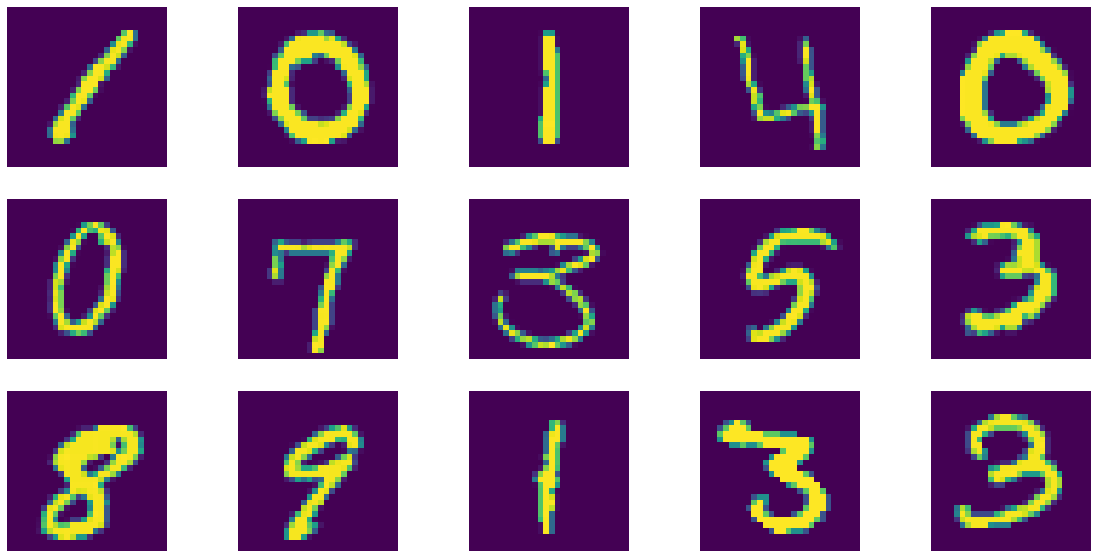

In [138]:
fig, ax = plt.subplots(nrows = 3, ncols = 5, figsize = (20,10))

image_counter = 0
for var1 in ax :
    for var2 in var1 :
        
        var2.imshow(image_arr[image_counter])
        var2.axis(False)
        image_counter += 1

In [139]:
num_predictors = xvals.shape

In [164]:
model = Sequential()

num_nodes = 500

model.add(Input(shape = (num_predictors[1])))
model.add(Dense(num_nodes, activation = 'relu'))
model.add(Dense(num_nodes, activation = 'relu'))
model.add(Dense(num_nodes, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(xvals, yvals, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
1050/1050 [==============================] - 6s 5ms/step - loss: 1.3441 - accuracy: 0.8828 - val_loss: 0.3685 - val_accuracy: 0.9160
Epoch 2/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2314 - accuracy: 0.9421 - val_loss: 0.2683 - val_accuracy: 0.9330
Epoch 3/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.1590 - accuracy: 0.9560 - val_loss: 0.1689 - val_accuracy: 0.9540
Epoch 4/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.1581 - accuracy: 0.9573 - val_loss: 0.1717 - val_accuracy: 0.9561
Epoch 5/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.1396 - accuracy: 0.9621 - val_loss: 0.1703 - val_accuracy: 0.9593
Epoch 6/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.1331 - accuracy: 0.9644 - val_loss: 0.1711 - val_accuracy: 0.9561
Epoch 7/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.1228 - accuracy: 0.9678 - val_loss: 0.1784 - val_accuracy:

In [223]:
conf_preds = model.predict(xvals)
pred_values = []

for var4 in range(0, len(conf_preds)):
    pred_values.append(conf_preds[var4].argmax())

In [224]:
actual_y = np.array(train_df['label'])

In [227]:
matrix = conf(actual_y, pred_values)

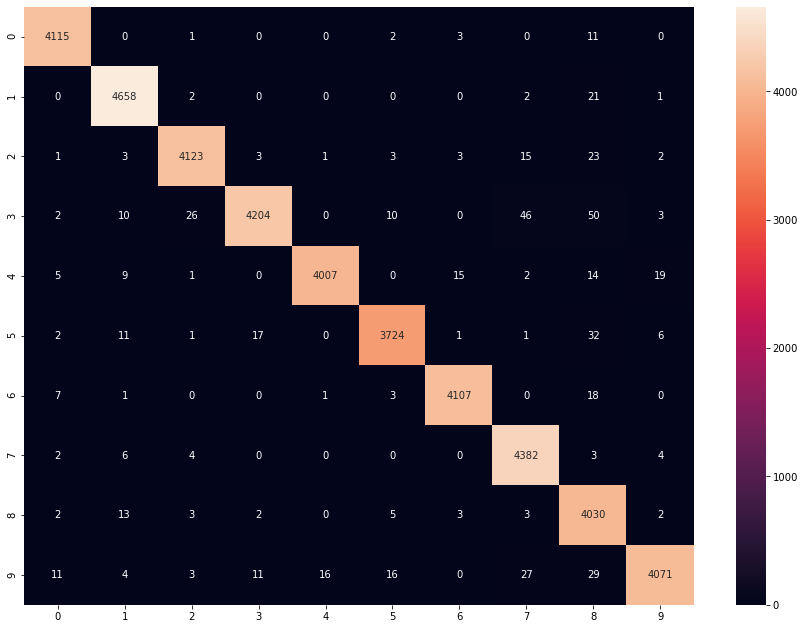

In [230]:
plt.figure(figsize = (15,11))
sns.heatmap(matrix, annot = True, fmt = 'g')
plt.show()

In [165]:
test_xvals = np.array(test_df)

In [166]:
preds = model.predict(test_xvals)
preds

array([[4.6700532e-33, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6082663e-06, 1.9013689e-10, 1.5723225e-15, ..., 1.4218051e-05,
        1.2421575e-05, 9.9996293e-01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 9.5638854e-18, ..., 4.8208779e-15,
        6.6583231e-35, 2.9121967e-32],
       [6.3011025e-06, 3.2029515e-08, 2.1200285e-11, ..., 1.0882207e-04,
        6.0890790e-05, 9.9976820e-01],
       [1.1490466e-35, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [167]:
pred_classes = []
for var3 in range(0, len(preds)) :
    pred_classes.append(preds[var3].argmax())
    
pred_classes[0:10]

[2, 0, 9, 2, 3, 7, 0, 3, 0, 3]

In [170]:
final_df = pd.DataFrame({"ImageId" : range(1, len(pred_classes)+ 1), "Label" : pred_classes})
final_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,3
